## Linear Regression with Stochastic Gradient Descent 

Implement linear regression methods from stracth using Numpy. This notebook would like to bridge linear regression model to neural network. In the lecture, we mentioned three key steps in neural network: neural network structures, loss function and optimization. Therefore, we will approach linear regression as neural network in the following. It will be optimized using gradient descent algorithm that gradient derivations are provided. 

## Agenda

1. Generating a toy dataset
2. Neural Network Structures
3. Loss Function
4. Optimization
5. Summary

Single-Variable Linear Regression can be formulated as a very simple network: a one-input one-output model. The model can predict the target value y from the input value x.  

## Part 1: Generating a toy dataset

In this example, the targets  will be generated from a function  and additive Gaussian noise sampled from , where  is the normal distribution with mean 0 and variance 0.2.  is defined as , with  the input samples, slope  and intercept .  is .

We will sample 20 input samples  from the uniform distribution between 0 and 1, and then generate the target output values  by the process described above. These resulting inputs  and targets  are plotted against each other in the figure below together with the original  line without the gaussian noise. Note that  is a vector of individual input samples 
, and that  is a corresponding vector of target values 
.

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns 

np.random.seed(seed=888)

In [10]:
# Define the vector of input samples as x, with 20 values 
# sampled from a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise 
# so the estimation won't be perfect.
# Define a function f that represents the line that generates t 
# without noise.
f = lambda x: x * 2.5

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = np.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

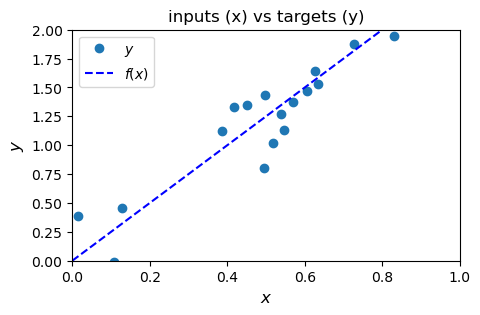

In [11]:
# Plot the target t versus the input x
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$y$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (y)')
plt.legend(loc=2)
plt.show()
#

## Part 2: Neural network structure

The network is trying to learn the mapping from input x to target y. The transformation here would be the input $x$ multiply the wegiht $w$ to generate the predicted output $\hat{y}$. The predicted  $\hat{y}$ should be as close as possible to the ground-truth $y$. Here, for simplicity, we ignore the bias term. The simple linear regression can be represented graphically:


<img src="../notebook_imgs/graph_linearregression.jpg" width="40%">

In [12]:
def nn(x, w):
    """Output function predicted y = x * w"""
    return x * w

The above model/structure represents the infinite function space which is parameterized by $w$. We need to find the best model. Or we can ask: how can we evaluate each model in that infinite function space. To answer that, we need to evaluate each function, i.e., loss function, over all samples. 

## Part 3: Loss function

We will optimize the model by tuning parameter $w$ so that the mean squared error (MSE) along all samples is minimized.

For regression problem, we usually use the mean squared error defined as $\frac{1}{N}\sum_{i=1}^{N}||y_i-\hat{y}_i||^2$ where N is the number of samples in the training set. Therefore, the optimization goal is: 

$argmin_w\frac{1}{N}\sum_{i=1}^{N}||y_i-\hat{y}_i||^2$ . 

In [13]:
def loss(y_bar, y):
    """MSE loss function"""
    return np.mean((y_bar - y)**2)

we can also show the loss curve as below. The loss curve show the loss values under different parameters. A shown below, the value $w=2.5$ is at the bottom. And the value is the same slope that we choose for $f(x)$. 

This function here is convex so that there is the global optimal point. 


In [ ]:
# Plot the loss vs the given weight w

# Vector of weights for which we want to plot the loss
ws = np.linspace(0, 5, num=100)  # weight values
# loss for each weight in ws
loss_ws = np.vectorize(lambda w: loss(nn(x, w) , t))(ws)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss function with respect to $w$')
plt.xlim(0, 5)
plt.legend()
plt.show()
#

## Part 4: Optimization

For a simple loss function like in this example, you can see easily what the optimal weight should be. However, in practice the error surface can be quite complex with many hills and valleys, or have a high dimensionality (each parameter adds a new dimension). This is why we use [optimization techniques](https://en.wikipedia.org/wiki/Mathematical_optimization) like gradient descent to find the minimum of the error function.

### Gradient descent

One optimization algorithm commonly used to train neural networks is the [gradient descent](http://en.wikipedia.org/wiki/Gradient_descent) algorithm. The gradient descent algorithm works by taking the [gradient](http://en.wikipedia.org/wiki/Gradient) ([derivative](http://en.wikipedia.org/wiki/Derivative)) of the loss function $\xi$ with respect to the parameters at a specific position on this loss function, and updates the parameters in the direction of the negative gradient (down along the loss function).
The parameter $w$ is iteratively updated by taking steps proportional to the negative of the gradient:
$$
w(k+1) = w(k) - \Delta w(k)
$$

With $w(k)$ the value of $w$ at iteration $k$ during the gradient descent.  
$\Delta w$ is defined as:
$$
\Delta w = \mu \frac{\partial \xi}{\partial w}
$$

With $\mu$ the learning rate, which is how big of a step you take along the gradient, and ${\partial \xi}/{\partial w}$ the gradient of the loss function $\xi$ with respect to the weight $w$. For each sample $i$ this gradient can be splitted according to the [chain rule](http://en.wikipedia.org/wiki/Chain_rule) into:

$$
\frac{\partial \xi_i}{\partial w} = \frac{\partial \xi_i}{\partial y_i} \frac{\partial y_i}{\partial w}
$$

Where $\xi_i$ is the squared error loss, so the ${\partial \xi_i}/{\partial y_i}$ term can be written as:

$$
\frac{\partial \xi_i}{\partial y_i} = \frac{\partial (t_i - y_i)^2}{\partial y_i} = - 2 (t_i - y_i) = 2 (y_i - t_i)
$$

And since $y_i = x_i \cdot w$ we can write ${\partial y_i}/{\partial w}$ as:

$$
\frac{\partial y_i}{\partial w} = \frac{\partial (x_i \cdot w)}{\partial w} = x_i
$$

So the full update function $\Delta w$ for sample $i$ will become:

$$
\Delta w = \mu \cdot \frac{\partial \xi_i}{\partial w} = \mu \cdot 2 x_i (y_i - t_i)
$$

In the batch processing, we just add up all the gradients for each sample:

$$
\Delta w = \mu * 2 * \frac{1}{N} \sum_{i=1}^{N} x_i (y_i - t_i)
$$

The gradient descent algorithm is typically initialised by starting with random initial parameters. After initiating these parameters we can start updating these parameters with $\Delta w$ until convergence. The learning rate needs to be tuned separately as a hyperparameter for each neural network.

The gradient ${\partial \xi}/{\partial w}$ is implemented by the `gradient(w, x, t)` function. $\Delta w$ is computed by the `delta_w(w_k, x, t, learning_rate)`. The loop below performs 4 iterations of gradient descent while printing out the parameter value and current loss.


In [17]:
def gradient(w, x, t):
    """Gradient function. (Remember that y = nn(x, w) = x * w)"""
    return 2 * x * (nn(x, w) - t)


def delta_w(w_k, x, t, learning_rate):
    """Update function delta w"""
    return learning_rate * np.mean(gradient(w_k, x, t))


# Initial weight parameter
w = np.random.rand()
# Set the learning rate
learning_rate = 0.9

# Perform the gradient descent updates, and print the weights and loss:
nb_of_iterations = 4  # number of gradient descent updates
w_loss = [(w, loss(nn(x, w), t))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Delta w update
    w = w - dw  # Update the current weight parameter
    w_loss.append((w, loss(nn(x, w), t)))  # Save weight and loss

# Print the final w, and loss
for i in range(0, len(w_loss)):
    print(f'w({i}): {w_loss[i][0]:.4f} \t loss: {w_loss[i][1]:.4f}')

w(0): 0.8663 	 loss: 0.9100
w(1): 1.8585 	 loss: 0.1600
w(2): 2.2269 	 loss: 0.0566
w(3): 2.3636 	 loss: 0.0424
w(4): 2.4143 	 loss: 0.0404


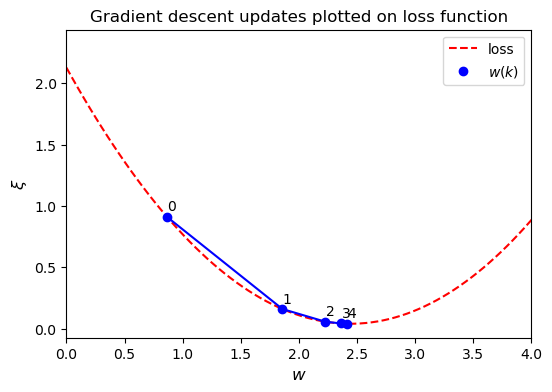

In [18]:
# Visualise the gradient descent updates
plt.figure(figsize=(6, 4))
plt.plot(ws, loss_ws, 'r--', label='loss')  # Loss curve
# Plot the updates
for i in range(0, len(w_loss)-1):
    w1, c1 = w_loss[i]
    w2, c2 = w_loss[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.05, f'${i}$')
plt.plot(w2, c2, 'bo', label='$w(k)$')
plt.text(w2, c2+0.05, f'${i+1}$')
# Show figure
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('Gradient descent updates plotted on loss function')
plt.xlim(0, 4)
plt.legend(loc=1)
plt.show()
#

## Part 5: Summary

We can see how single variable linear regression can be approached as neural network. 